<a href="https://colab.research.google.com/github/hamsungmin/DataTrainAnalysis/blob/main/project_week4_%EA%B5%AC%EB%A7%A4%ED%8A%B8%EB%A0%8C%EB%93%9C%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 콘크리트 압축 강도 예측 데이터 EDA 개요

concrete_data.csv를 사용하여 콘크리트의 압축 강도 데이터의 EDA를 수행합니다.

스스로 데이터 불러오기, 데이터 확인, 데이터 전처리, EDA를 진행합니다.

EDA 중 확인한 인사이트는 markdown으로 정리해봅니다.

미리 작성되어 있는 작업은 모두 구현해주시고 시간이 남으신다면 그 이외의 작업도 좋으니 스스로 생각하며 진행해봅니다.

코드 셀은 얼마든지 새로 추가하고 삭제하시며 사용하셔도 좋습니다.
  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### 데이터셋 개요
- 이 데이터셋은 콘크리트의 다양한 구성 요소와 그에 따른 압축 강도를 포함하고 있는 데이터셋입니다.   

- 총 1030개의 샘플이 있으며, 각 샘플은 콘크리트를 구성하는 재료의 양과 콘크리트가 경화된 후의 압축 강도를 나타냅니다.   

- 이 데이터셋은 콘크리트의 압축 강도를 예측하기 위한 머신러닝 모델을 개발하는 데 사용됩니다.   

- 우리가 예측하려는 것은 콘크리트의 압축 강도(concrete_compressive_strength)입니다.   




In [ ]:
df = pd.read_csv('/content/concrete_data.csv')
df.head(2)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


**df의 각 컬럼 설명**   

- **cement:** 콘크리트를 만들 때 사용되는 시멘트의 양입니다. 시멘트는 물과 결합하여 콘크리트를 단단하게 만드는 중요한 재료입니다. (단위: kg)   

- **blast_furnace_slag:** 철을 만들 때 나오는 부산물인 고로 슬래그의 양입니다. 이 재료는 콘크리트의 강도를 높이고 내구성을 향상시키는 데 사용됩니다. (단위: kg)   

- **fly_ash:** 석탄을 태울 때 발생하는 미세한 재로, 플라이 애쉬의 양입니다. 플라이 애쉬는 콘크리트의 작업성을 개선하고 장기적인 강도를 증가시킵니다. (단위: kg)   

- **water:** 콘크리트를 혼합할 때 사용되는 물의 양입니다. 물은 시멘트와 반응하여 콘크리트를 굳게 만듭니다. (단위: kg)   

- **superplasticizer:** 콘크리트의 유동성을 높여주는 화학 첨가제의 양입니다. 이 첨가제는 물의 사용량을 줄이면서도 콘크리트를 쉽게 다룰 수 있게 합니다. (단위: kg)   

- **coarse_aggregate:** 콘크리트에 포함된 큰 자갈이나 돌의 양입니다. 굵은 골재는 콘크리트의 구조적 강도를 제공하는 역할을 합니다. (단위: kg)   

- **fine_aggregate:** 콘크리트에 포함된 모래와 같은 작은 입자의 양입니다. 잔골재는 콘크리트의 표면을 매끄럽게 하고 강도를 보강합니다. (단위: kg)   

- **age:** 콘크리트가 굳어진 후 경과된 시간입니다. 일반적으로 일 단위로 측정되며, 콘크리트의 강도는 시간이 지남에 따라 증가합니다. (단위: 일)   

- **concrete_compressive_strength:** 콘크리트가 압축되는 힘을 견디는 능력입니다. 이 값은 콘크리트의 품질과 내구성을 평가하는 중요한 지표입니다. (단위: MPa)   

   
   


---
## 스스로 프로젝트 진행해보기

#### 1. 데이터의 information을 확인하여 결측치, 데이터 타입 등을 확인 후 데이터 전처리를 어떻게 할 것인지 결정해봅니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### 2. 각 컬럼의 결측치 비율을 확인 후 만약 결측치가 존재한다면 결측치를 적절한 방법으로 처리해봅니다.

In [ ]:
df.isnull().mean()

,0
cement,0.0
blast_furnace_slag,0.0
fly_ash,0.0
water,0.0
superplasticizer,0.0
coarse_aggregate,0.0
fine_aggregate,0.0
age,0.0
concrete_compressive_strength,0.0


In [ ]:
print(df.columns.tolist())

['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age', 'concrete_compressive_strength']


In [ ]:
df['fine_aggregate'] = df['fine_aggregate ']

# 결측치 결과

데이터 결측치가 존재 하지 않습니다

0kg 이어도 재료 조합중 안넣는 것으로 판단할 수 있어 결측치는 없는 것으로 보입니다

* 'fine_aggregate ' 공백이 들어가 있어 공백 제거

#### 3. 데이터 전처리 후 EDA를 진행하며 데이터에 대한 이해를 높여봅니다.

##### 3-1. 각 컬럼들의 분포를 시각화

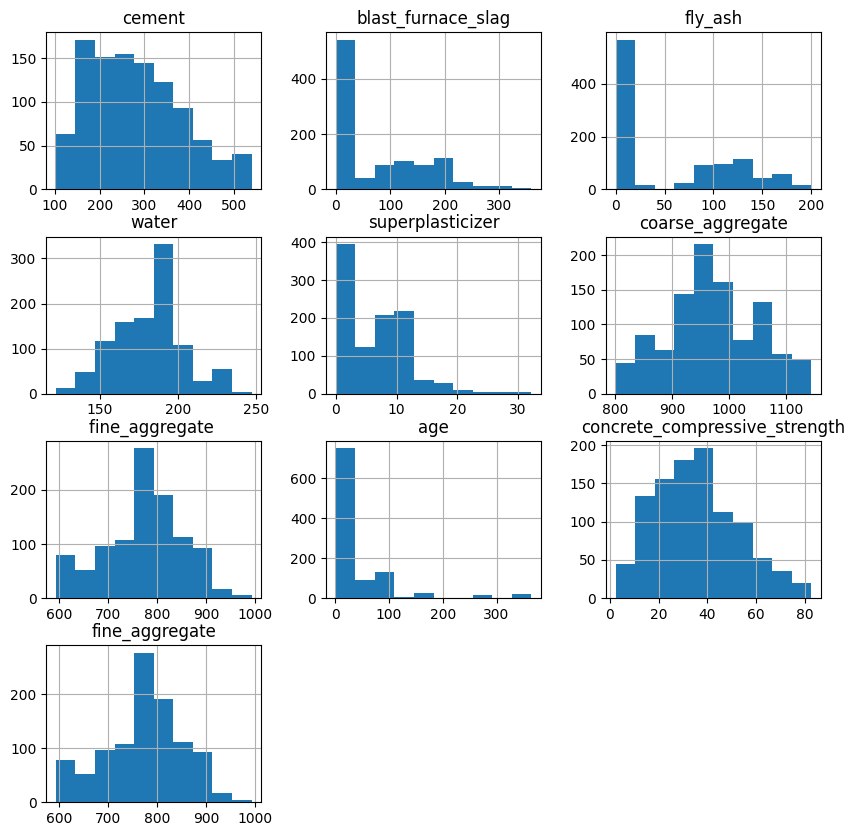

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

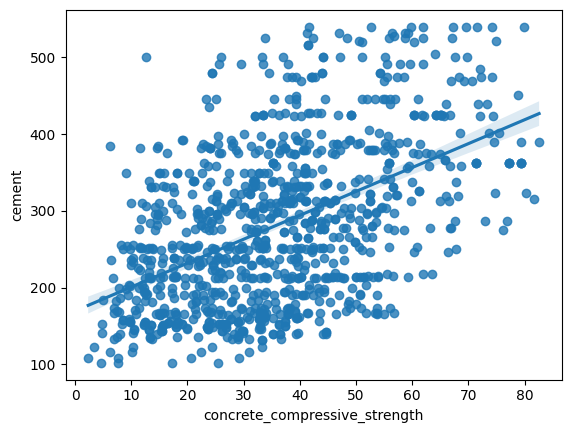

In [ ]:
sns.regplot(data=df, x=df['concrete_compressive_strength'], y=df['cement']);
plt.show()

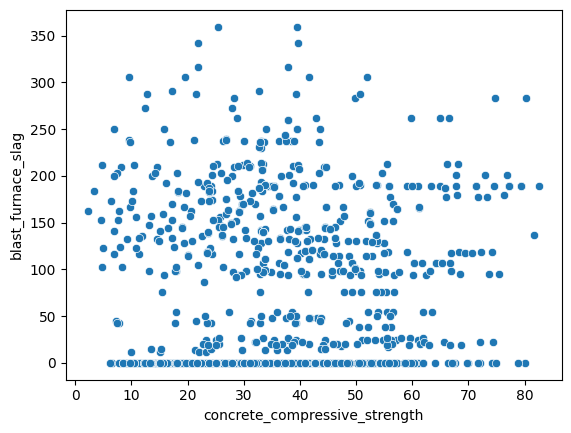

In [ ]:
sns.scatterplot(x=df['concrete_compressive_strength'], y=df['blast_furnace_slag']);
plt.show()

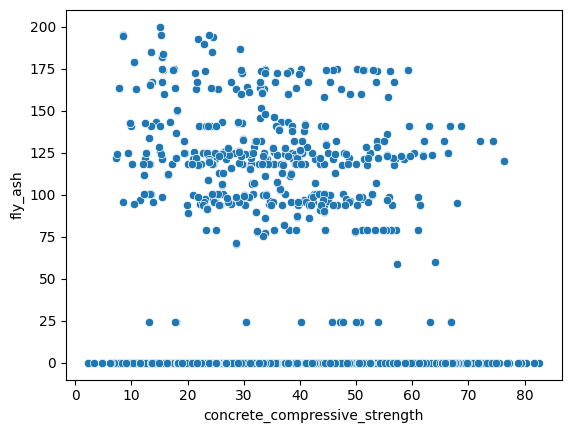

In [ ]:
sns.scatterplot(x=df['concrete_compressive_strength'], y=df['fly_ash']);
plt.show()

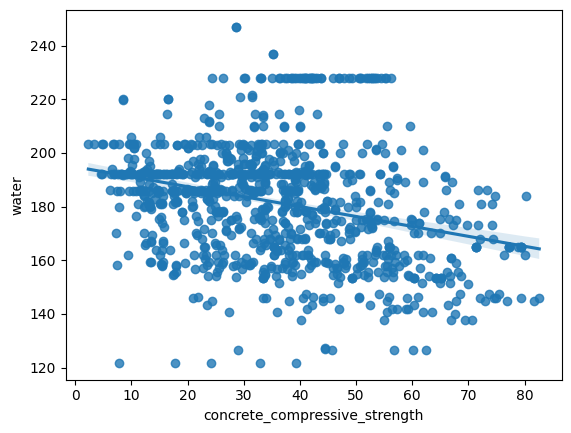

In [ ]:
sns.regplot(data=df, x=df['concrete_compressive_strength'], y=df['water']);
plt.show()

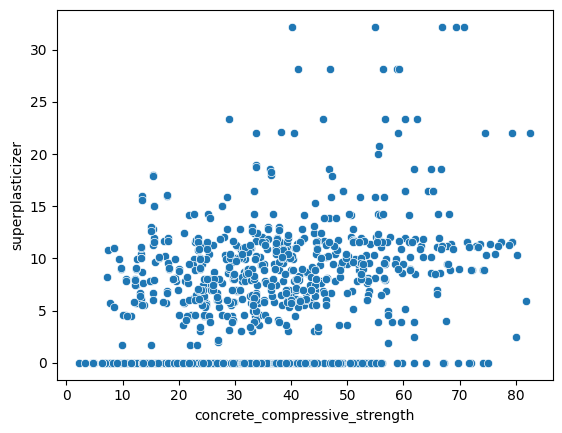

In [ ]:
sns.scatterplot(data=df, x=df['concrete_compressive_strength'], y=df['superplasticizer']);
plt.show()

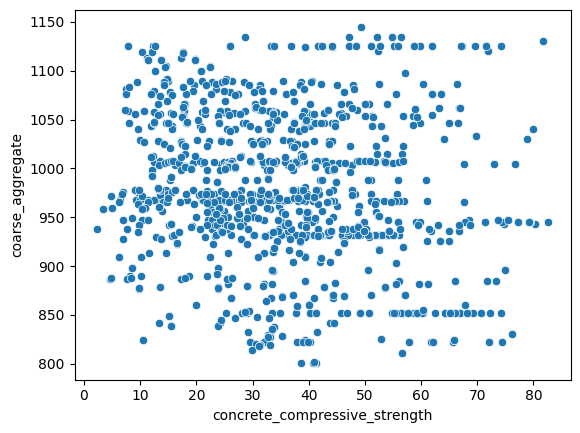

In [ ]:
sns.scatterplot(data=df, x=df['concrete_compressive_strength'], y=df['coarse_aggregate']);
plt.show()

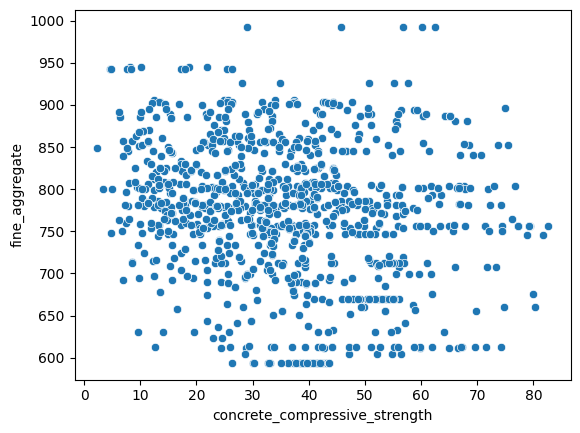

In [ ]:
sns.scatterplot(data=df, x=df['concrete_compressive_strength'], y=df['fine_aggregate']);
plt.show()

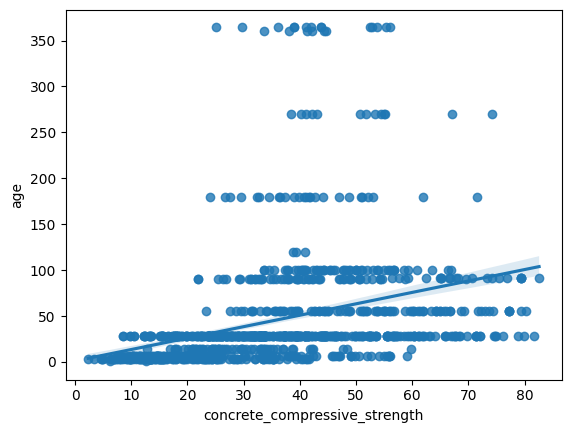

In [ ]:
sns.regplot(data=df, x=df['concrete_compressive_strength'], y=df['age']);
plt.show()

##### 3-2. 이상탐지(선택)
- 그래프를 통해 이상치를 시각화해서 살펴보고, 이상치를 처리하세요.
- 이상치는 IQR을 기준으로 하여 처리합니다.
- 처리 방법은 제거할수도, 대체할 수도 있는데, 여기서는 IQR의 Boundary 값으로 대체합니다.
<br><br>
Boundary는 아래의 공식으로 계산할 수 있습니다.
<br>lower_bound = Q1 - 1.5 * IQR
<br>upper_bound = Q3 + 1.5 * IQR


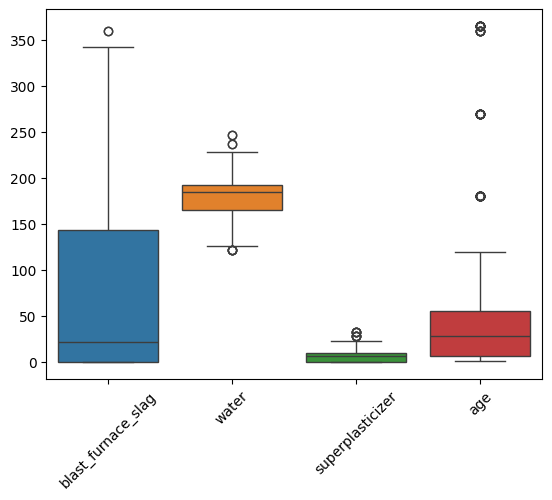

In [ ]:
sns.boxplot(data=df[['blast_furnace_slag', 'water', 'superplasticizer', 'age']])
plt.xticks(rotation=45)
plt.show()

IQR 경계값으로 대체 및 결과 시각화(선택)

In [ ]:
outlier_dict = {}
for name in df.columns:
  if np.issubdtype(df[name].dtype, np.number):
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outlier = ((df[name] < lower_bound) | (df[name] > upper_bound)).sum()
    outlier_dict[name] = num_outlier
    #IQR 경계값으로 대체
    df = df[(df[name] >= lower_bound) & (df[name] <= upper_bound)]


print(f'이상값 갯수 파악: {sum(outlier_dict.values())}')
for feature_name, num_outlier in outlier_dict.items():
  print(f'{feature_name}: {num_outlier}')




이상값 갯수 파악: 153
cement: 0
blast_furnace_slag: 2
fly_ash: 0
water: 9
superplasticizer: 10
coarse_aggregate: 0
fine_aggregate : 35
age: 44
concrete_compressive_strength: 4
fine_aggregate: 49


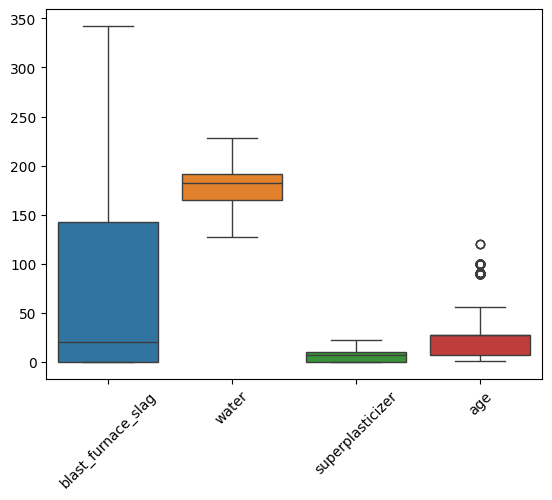

In [ ]:
sns.boxplot(data=df[['blast_furnace_slag', 'water', 'superplasticizer', 'age']])
plt.xticks(rotation=45)
plt.show()

##### 3-3. 데이터 분포 및 상관관계 확인
- 다양한 시각화를 이용하여 데이터 분포를 확인합니다.
- 또한, 변수 간의 상관관계를 확인합니다.

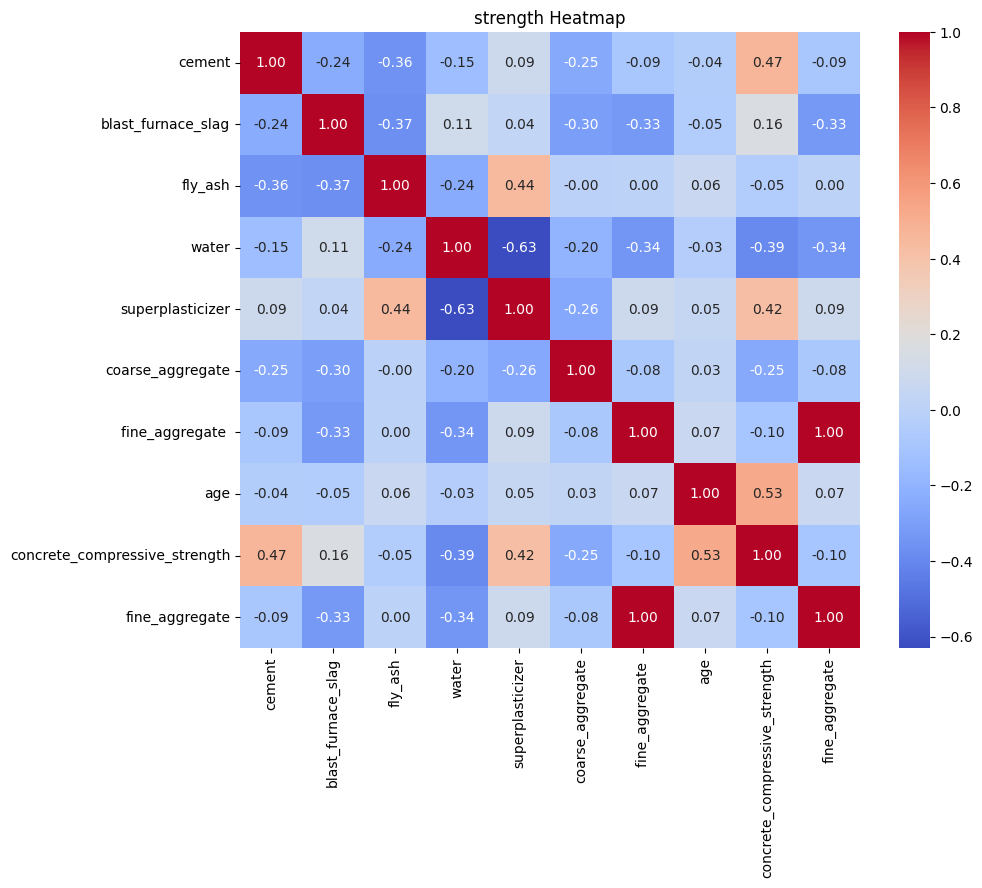

In [ ]:
#상관계수
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('strength Heatmap')
plt.show()

##### 3-4. 물, 시멘트, 압축강도의 관계를 산점도로 시각화

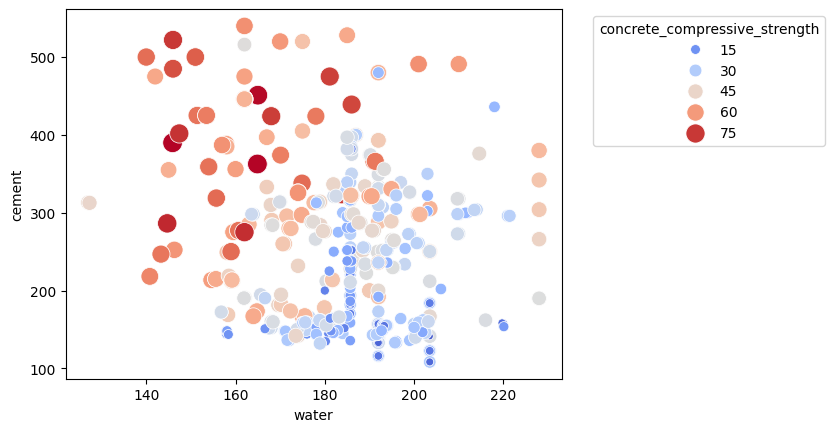

In [ ]:
sns.scatterplot(
  x='water',
  y='cement',
  hue='concrete_compressive_strength',
  size='concrete_compressive_strength',
  sizes=(20, 200),
  palette='coolwarm',
  data=df
)
plt.xlabel('water')
plt.ylabel('cement')
plt.legend(
  title='concrete_compressive_strength',
  bbox_to_anchor=(1.05, 1),
  loc='upper left'
)
plt.show()

#water은 적게 사용하고 cement를 많이 사용하면 압축 강도가 올라간

##### 3-5. 압축강도와 상관관계가 높은 3개 컬럼을 산점도로 시각화

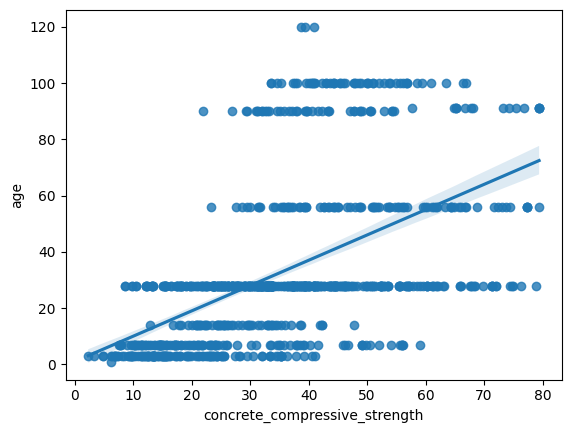

In [ ]:
#age = 0.53
#cement = 0.47
#superplasticizer = 0.42
sns.regplot(data=df, x=df['concrete_compressive_strength'], y=df['age']);
plt.show()

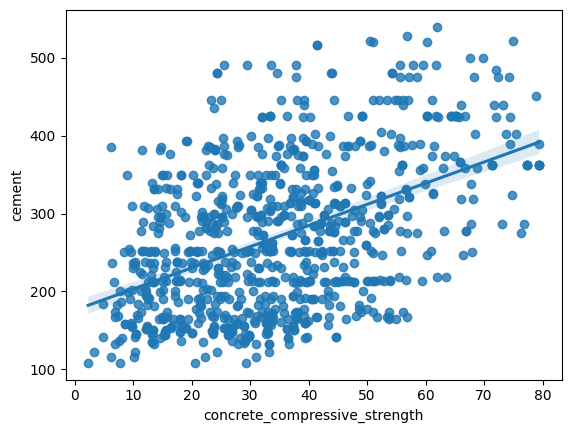

In [ ]:
sns.regplot(data=df, x=df['concrete_compressive_strength'], y=df['cement']);
plt.show()

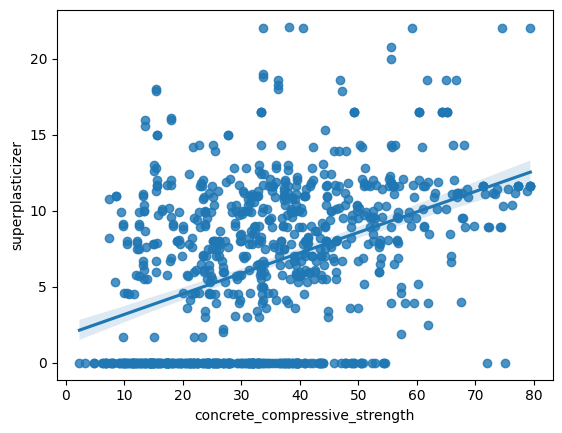

In [ ]:
sns.regplot(data=df, x=df['concrete_compressive_strength'], y=df['superplasticizer']);
plt.show()

#### 4. 2가지 방법의 데이터 전처리를 진행하여 값을 비교해봅니다.

- Min-Max
- StandardScaler

2가지 전처리 결과의 평균/중위값/표준편차를 비교합니다.



In [ ]:
#Min-Max 전처리

#원본 유지를 위해서 복
df_minmax = df.copy()
#컬럼값을 이용해서 print하기 위해서 dict으로 처리
for col in df.columns:
    min_val = df[col].min()
    max_val = df[col].max()
    #Min-Max 공식
    df_minmax[col] = (df[col] - min_val) / (max_val - min_val)

df_minmax.head(2)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,fine_aggregate
1,1.0000,0.000000,0.0,0.346535,0.113122,0.738372,0.152698,0.226891,0.772804,0.152698
5,0.3653,0.333236,0.0,1.000000,0.000000,0.380814,0.132338,0.747899,0.579992,0.132338


In [ ]:
#StandardScaler 전처리

#원본 유지를 위해서 복사
df_standard  = df.copy()
#컬럼값을 이용해서 print하기 위해서 dict으로 처리
for col in df.columns:
    mean_val = df[col].mean()
    std_val = df[col].std()
    df_standard[col] = (df[col] - mean_val) / std_val

df_standard.head(2)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,fine_aggregate
1,2.805446,-0.847247,-0.954306,-0.973676,-0.76334,1.095042,-1.726923,-0.152513,1.633786,-1.726923
5,-0.046457,0.497588,-0.954306,2.723502,-1.23748,-0.541581,-1.822665,2.041332,0.737600,-1.822665


In [ ]:
#Min-Max 결과값
min_max_mean = df_minmax.mean()
min_max_median = df_minmax.median()
min_max_std = df_minmax.std()

#Standard 결과값
standard_mean = df_standard.mean()
standard_meedian = df_standard.median()
standard_std = df_standard.std()

print(f"1. 평균 Min-Max : {min_max_mean}")
print(f"1. 평균 Standard : {standard_mean}")
print("--------------------------------------------------")

print(f"2. 중위값 Min-Max : {min_max_median}")
print(f"2. 중위값 Standard : {standard_meedian}")
print("--------------------------------------------------")

print(f"3. 표준편차 Min-Max : {min_max_std}")
print(f"3. 표준편차 Standard : {standard_std}")


1. 평균 Min-Max : cement                           0.375639
blast_furnace_slag               0.209939
fly_ash                          0.306465
water                            0.518629
superplasticizer                 0.295242
coarse_aggregate                 0.499135
fine_aggregate                   0.519932
age                              0.263110
concrete_compressive_strength    0.421300
fine_aggregate                   0.519932
dtype: float64
1. 평균 Standard : cement                          -5.671379e-16
blast_furnace_slag               1.620394e-17
fly_ash                         -3.240788e-17
water                           -1.134276e-15
superplasticizer                -1.296315e-16
coarse_aggregate                 6.805654e-16
fine_aggregate                   5.671379e-16
age                             -8.101970e-17
concrete_compressive_strength    1.296315e-16
fine_aggregate                   5.671379e-16
dtype: float64
--------------------------------------------------
2. 중위값

In [ ]:
#MinMaxScaler 이용해서 진행
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df)

df_minmax = pd.DataFrame(scaled_array, columns=df.columns)

min_max_mean = df_minmax.mean()
min_max_median = df_minmax.median()
min_max_std = df_minmax.std()

print(f"1. 평균 Min-Max : {min_max_mean}")
print(f"2. 중위값 Min-Max : {min_max_median}")
print(f"3. 표준편차 Min-Max : {min_max_std}")

1. 평균 Min-Max : cement                           0.375639
blast_furnace_slag               0.209939
fly_ash                          0.306465
water                            0.518629
superplasticizer                 0.295242
coarse_aggregate                 0.499135
fine_aggregate                   0.519932
age                              0.263110
concrete_compressive_strength    0.421300
fine_aggregate                   0.519932
dtype: float64
2. 중위값 Min-Max : cement                           0.333565
blast_furnace_slag               0.058462
fly_ash                          0.122439
water                            0.543564
superplasticizer                 0.334842
coarse_aggregate                 0.491279
fine_aggregate                   0.508992
age                              0.226891
concrete_compressive_strength    0.403140
fine_aggregate                   0.508992
dtype: float64
3. 표준편차 Min-Max : cement                           0.222553
blast_furnace_slag               0.24

In [ ]:
#StandardScaler 이용해서 진행
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)

df_standard = pd.DataFrame(scaled_array, columns=df.columns)

#Standard 결과값
standard_mean = df_standard.mean()
standard_meedian = df_standard.median()
standard_std = df_standard.std()

print(f"1. 평균 Standard : {standard_mean}")
print(f"2. 중위값 Standard : {standard_meedian}")
print(f"3. 표준편차 Standard : {standard_std}")

1. 평균 Standard : cement                          -5.671379e-16
blast_furnace_slag               1.620394e-17
fly_ash                         -3.240788e-17
water                           -1.134276e-15
superplasticizer                -1.296315e-16
coarse_aggregate                 6.805654e-16
fine_aggregate                   5.671379e-16
age                             -8.101970e-17
concrete_compressive_strength    1.296315e-16
fine_aggregate                   5.671379e-16
dtype: float64
2. 중위값 Standard : cement                          -0.189160
blast_furnace_slag              -0.611660
fly_ash                         -0.573369
water                            0.141160
superplasticizer                 0.166071
coarse_aggregate                -0.035978
fine_aggregate                  -0.051475
age                             -0.152600
concrete_compressive_strength   -0.084455
fine_aggregate                  -0.051475
dtype: float64
3. 표준편차 Standard : cement                           1.0